<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h3 align='center'> INF-335 Tecnologías de Búsqueda en la Web</h3>

<H1 align='center'> Análisis de Comentarios en Twitter Respecto al Acontecer Nacional Actual </H1>
<hr style="height:2px;border:none"/>


In [98]:
import twint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize, WordNetLemmatizer
%matplotlib inline


Para el desarrollo de este análisis de comentarios de twitter se utilizara un dataset de aproximadamente 76.000 comentarios recolectados mediante la libreria Twint de scraping de twitter, esta herramienta permite obtener comentarios de Twitter sin la necesidad de logearse y tampoco utilizar la API de Twitter que es bastante restrictiva.

In [99]:
df = pd.read_csv('./temp_files/all_data.csv', encoding='utf-8')
print(f'Cantidad de tweets {df.shape[0]}')

Cantidad de tweets 76236


## Limpieza de Datos

Primero se necesitan sacar los emojis que son ampliamente utilizados en la comunidad de twitter

In [100]:
df['tweet'][0:10]

0    #18Oct En Santiago de #Chile, ciudadanos se vi...
1    #AFPs #Chile\nEste 22 de octubre se define si ...
2    #EvasionMasivaTodoElDia y #Chile son tendencia...
3    Protestas, represión por parte de los organism...
4    Es importante destacar que este es el segundo ...
5    Are you ready? Curso de inglés, Clases particu...
6    QUE ARDA CHILE CONCHETUMADRE 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥 #...
7    ¿En las noticias del extranjero mostrarán que ...
8    #dia triste en #Chile. Asi no me gusta mi pais...
9    Como extraño los CDs que vendían en chacaito d...
Name: tweet, dtype: object

In [101]:
import re
import emoji

#otra función para quitar emojis, usando el paquete emoji
def freemoji(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

df["tweet"] = df["tweet"].str.lower()
tweets=df['tweet'].apply(freemoji)
df['tweet'] = tweets
df['tweet'][0:10]

0    #18oct en santiago de #chile, ciudadanos se vi...
1    #afps #chile este 22 de octubre se define si l...
2    #evasionmasivatodoeldia y #chile son tendencia...
3    protestas, represión por parte de los organism...
4    es importante destacar que este es el segundo ...
5    are you ready? curso de inglés, clases particu...
6    que arda chile conchetumadre #paronacional #ev...
7    ¿en las noticias del extranjero mostrarán que ...
8    #dia triste en #chile. asi no me gusta mi pais...
9    como extraño los cds que vendían en chacaito d...
Name: tweet, dtype: object

Se crea una nueva columna con hashtags que se encuentran en el texto de los tweets.

In [102]:
df['hashtag'] = df['tweet'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x))
df['hashtag'][:10]

0                     [#18oct, #chile, #metrosantiago]
1            [#afps, #chile, #aguanteelneoliberalismo]
2                    [#evasionmasivatodoeldia, #chile]
3    [#chile, #metrosantiago, #evasionmasiva, #chil...
4                             [#evasiónmasiva, #chile]
5    [#limaperu, #lamolina, #miraflores, #sanborja,...
6    [#paronacional, #evasionmasiva, #evadireslucha...
7    [#evasionmasivatodoeldia, #evasiontodoeldia, #...
8                                       [#dia, #chile]
9         [#caracas, #cacerolazos, #chile, #venezuela]
Name: hashtag, dtype: object

In [103]:
import json
from cucco import Cucco

with open('stop_words.json') as f:
  stop_words2 = json.load(f)
cucco = Cucco()
stop_words = list(set(stopwords.words('spanish')))
stop_words2 = stop_words2['words']
other_stop_words = ['cosa', 'puede','estan','estar', 'mano', 'hace', 'gran', 'chile', '._.', 'ahora', 'weon', 
                    'mientra','mejor', 'dicen', 'después', 'despue', 'hacer', 'mientra', 'mientras', 'decir', 
                    'dice', 'menos', 'queremos', 'hjovu', 'mismo', 'toda', 'vamo', 'vamos', 'igual', 'aquí', 
                    'quiere', 'ustedes', 'nadie', 'sólo', 'sigue', 'nadie', "'","...","''","#","<",">","}",
                    "{","]","[","´","?","¡","!","¿","/","*", '"',"-","--",";",":","::","=",")","(","&","|",
                    "'ve","'t","'s", "'ll","n't",">.<","<3","._.","~","<br","</","/>","<<",">>","~~", ",","d",
                    "na","m","''","´´","!!!!!",'"(','",','.;','[*','tm','").',
                    "l",'"&',').*','://','www','http','"...',"=[", '@', '``']
stop_words = stop_words + stop_words2 + other_stop_words
texto = ''
clear_tweets = []
for t in tweets:
    t = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)'
               , ''
               , t
               , flags=re.MULTILINE) 
    t = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', t, flags=re.MULTILINE)
    t = re.sub(r"#(\w+)", ' ', t, flags=re.MULTILINE)
    t = re.sub(r"@(\w+)", ' ', t, flags=re.MULTILINE)
    t = re.sub(r'[0-9]+', '', t)
    t = cucco.normalize(str(t))
    clear_tweets.append(t)
    texto += ' ' + t
    
tweets = clear_tweets
df['clear_tweet'] = clear_tweets
words_tokens = word_tokenize(texto)
filtered_sentences = [w for w in words_tokens if not w in stop_words and len(w) > 3]

## WordCloud

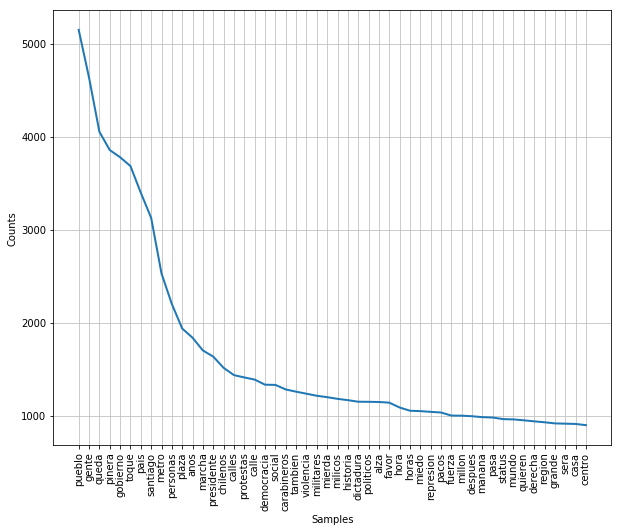

In [49]:
from nltk.probability import FreqDist
plt.rcParams['figure.figsize'] = [10, 8]

freq_dist = FreqDist(filtered_sentences)
freq_dist.plot(50)

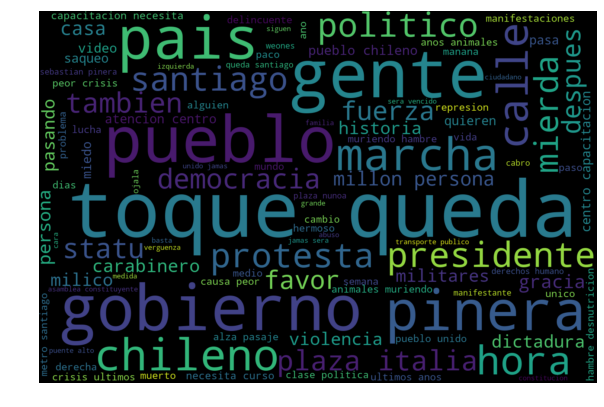

In [50]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

WC_height = 1000
WC_width = 1500
WC_max_words = 100

#Reemplacen la variable texto_words por sus propias variables
wordcloud = WordCloud( max_words=WC_max_words, height=WC_height, width=WC_width, background_color="black").generate(str(filtered_sentences).replace("'",""))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

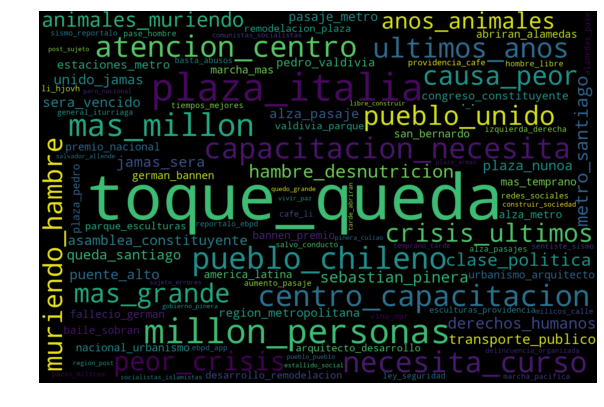

In [51]:
from nltk.util import ngrams
from nltk.collections import Counter

freq_bigrams =  Counter([])
freq_trigrams = Counter([])

for t in clear_tweets:
    token = word_tokenize(t)
    clear_text = ''
    for i in token:
        if i not in stop_words and len(token) > 3:
            clear_text += ' ' + i
    token = word_tokenize(clear_text)
    bigrams = list(ngrams(token, 2))
    trigrams = list(ngrams(token, 3))
    
    freq_bigrams += Counter(bigrams)
    freq_trigrams += Counter(trigrams)
    
words_dict_bigrams = [(f'{w1}_{w2}', freq_bigrams[(w1, w2)]) for w1, w2 in freq_bigrams.keys()]
words_dict_trigrams = [(f'{w1}_{w2}_{w3}', freq_trigrams[(w1, w2, w3)]) for w1, w2, w3 in freq_trigrams.keys()]

words_dict_bigrams = dict(words_dict_bigrams)
words_dict_trigrams = dict(words_dict_trigrams)

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=stop_words)
wordCloud.generate_from_frequencies(words_dict_bigrams)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

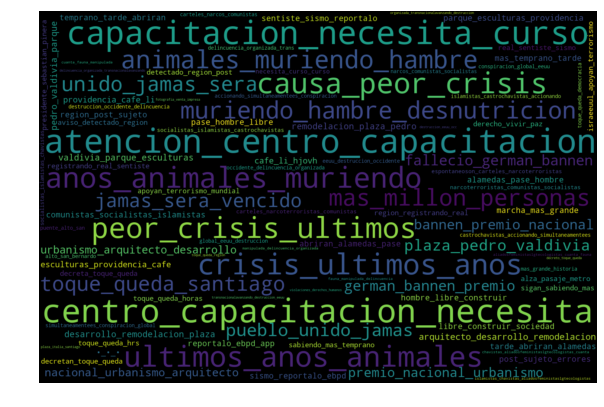

In [52]:
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=stop_words)
wordCloud.generate_from_frequencies(words_dict_trigrams)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [54]:
def create_lemma_dict():
    #encoding: utf8
    lemmaDict = {}
    with open('lemmatizer/lemmatization-es.txt', 'rb') as f:
       data = f.read().decode('utf8').replace(u'\r', u'').split(u'\n')
       data = [a.split(u'\t') for a in data]

    for a in data:
       if len(a) > 1:
          lemmaDict[a[1]] = a[0]
    return lemmaDict

lemma_dict =  create_lemma_dict()

In [55]:
def lemmatize(word):
    return lemma_dict.get(word, word)

def stemmer():
    return 0

def tokenize(data, corpus='nltk'):
    stop_words = stopwords.words('spanish')
    lemmatizer = WordNetLemmatizer()
    tokenize_data = []
    
    for text in data:
        with open('stop_words.json') as f:
          stop_words2 = json.load(f)

        stop_words = list(set(stopwords.words('spanish')))
        stop_words2 = stop_words2['words']
        other_stop_words = ['cosa', 'puede','estan','estar', 'mano', 'hace', 'gran', 'chile', '._.', 'ahora', 'weon', 
                            'mientra','mejor', 'dicen', 'después', 'despue', 'hacer', 'mientra', 'mientras', 'decir', 
                            'dice', 'menos', 'queremos', 'hjovu', 'mismo', 'toda', 'vamo', 'vamos', 'igual', 'aquí', 
                            'quiere', 'ustedes', 'nadie', 'sólo', 'sigue', 'nadie', "'","...","''","#","<",">","}",
                            "{","]","[","´","?","¡","!","¿","/","*", '"',"-","--",";",":","::","=",")","(","&","|",
                            "'ve","'t","'s", "'ll","n't",">.<","<3","._.","~","<br","</","/>","<<",">>","~~", ",","d",
                            "na","m","''","´´","!!!!!",'"(','",','.;','[*','tm','").',
                            "l",'"&',').*','://','www','http','"...',"=[", '@', '``']
        stop_words = stop_words + stop_words2 + other_stop_words
        
        text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', text, flags=re.MULTILINE) 
        text = re.sub(r'[-a-zA-Z0–9@:%._\abs+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', text, flags=re.MULTILINE)
        text = re.sub(r"#(\w+)", ' ', text, flags=re.MULTILINE)
        text = re.sub(r"@(\w+)", ' ', text, flags=re.MULTILINE)
        text = re.sub(r'[0-9]+', '', text)
        text = cucco.normalize(str(text))
        word_tokens = word_tokenize(text)
        words = ''
        for word in word_tokens:
            if (word not in stop_words) and len(word) > 3:
                if corpus == 'nltk':
                    words += ' ' + lemmatize(word.lower())
        tokenize_data += [words]
    return tokenize_data

### Word Embedding

In [56]:
EMBEDDING_DIM = 300
FILE = "C:\\Users\\Castillo\\Desktop\\Proyecto-INF-335\\embeddings\\embeddings-l-model.vec"
embeddings_index = {}
# Load embeddings
with open(FILE, encoding='utf8') as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype = 'float32') 

In [57]:
def generate_feature_matrix(sentences):
    feature_matrix = np.empty((0,0))
    for sentence in sentences:
        words = sentence.split()
        words_matrix = np.empty((0,0))
        for word in words:
            emb_vector = embeddings_index.get(word)
            if emb_vector is None:
                emb_vector = np.zeros(EMBEDDING_DIM)
            
            if words_matrix.shape == (0,0):
                words_matrix = emb_vector[np.newaxis,:]
            else:
                words_matrix = np.concatenate((words_matrix, emb_vector[np.newaxis,:]), axis=0)
        awe_sentence = words_matrix.mean(0)
        if feature_matrix.shape == (0,0):
            feature_matrix = awe_sentence[np.newaxis,:]
        else:
            feature_matrix = np.concatenate((feature_matrix, awe_sentence[np.newaxis,:]), axis=0)
    print(feature_matrix.shape)
    return feature_matrix

### Train Corpus TASS

In [58]:
import os
import glob
from lxml import objectify
extension = 'xml'
def merge_corpus(dir):
    os.chdir(dir)
    file_names = [i for i in glob.glob(f'*.{extension}')]
    all_df = []
    print(file_names)
    for file in file_names:
        print(file)
        xml = objectify.parse(open(file, encoding='utf8'))
        root = xml.getroot()
        tweets_df = pd.DataFrame(columns=['content', 'polarity'])
        tweets = root.getchildren()
        for i in range(len(tweets)):
            tweet = tweets[i]
            row = dict(zip(['content', 'polarity'], [tweet.content.text, tweet.sentiments.polarity.value.text]))
            row = pd.Series(row)
            row.name = i
            tweets_df = tweets_df.append(row)
        all_df.append(tweets_df)
    all_data = pd.concat(all_df)
    all_data.to_csv('all_tass.csv', index=False, encoding='utf-8')
    
# merge_corpus('C:\Users\Castillo\Desktop\Proyecto-INF-335\tass')

In [95]:
# Se cargan los tweets de TASS
df_tass = pd.read_csv('all_tass.csv', encoding='utf-8')
df_tass.dropna(inplace=True)
# Se eliminan los tweets sin etiqueta de polaridad
df_tass = df_tass[df_tass['polarity'] != 'NONE']
tweets_tass = df_tass['content'].apply(freemoji)
tweets_tass = tokenize(tweets_tass)

In [96]:
df_tass['content'] = tweets_tass
df_tass = df_tass[df_tass['content'] != '']
unique_labels = df_tass['polarity'].unique()
print(unique_labels)
# Se reemplazan las etiquetas P+ por P y N+ por N
df_tass['polarity'] = df_tass['polarity'].replace('N+', 'N')
df_tass['polarity'] = df_tass['polarity'].replace('P+', 'P')
df_tass[:10]

['N' 'P+' 'P' 'N+' 'NEU']


,content,polarity
0,portar publicar viernes fabra banquillo orden...,N
2,gonzalo altozano presentacion librar espanole...,P
3,manana gaceta pagar culpar becario falso info...,N
5,manana gaceta amaiur depender uxue barkos cre...,N
6,noche followercetes manana mitico contar http...,P
7,manana gaceta upyd contar seguro grupo gracia...,P
8,felicidad anhelo pequenas ocurrir dias bueno ...,P
9,ver ver responder rajoy rudi bauza reclamar m...,N
11,habia prometer responder imposible mucho grac...,P
12,mucho gracia comentario programar,P


In [79]:
import math 
from sklearn.model_selection import train_test_split


size_test_set = math.ceil(df_tass.shape[0]*0.20)
df_train_text, df_test_text, labels_train, labels_test  = train_test_split(df_tass, df_tass['polarity'],
                                                                         test_size= size_test_set,
                                                                         random_state=0)
feature_matrix_train = generate_feature_matrix(df_train_text['content'].tolist())

(73896, 300)


In [80]:
np.save('feature_matrix_train.npy', feature_matrix_train)

In [82]:
labels_train = labels_train.replace('N',-1)
labels_train = labels_train.replace('P',1)
labels_train = labels_train.replace('NEU', 0)

labels_test = labels_test.replace('N',-1)
labels_test = labels_test.replace('P',1)
labels_test = labels_test.replace('NEU', 0)
feature_matrix_test = generate_feature_matrix(df_test_text['content'].tolist())


(18475, 300)


In [83]:
np.save('feature_matrix_test.npy', feature_matrix_test)

In [84]:
feature_matrix_train = np.load('feature_matrix_train.npy')
feature_matrix_test = np.load('feature_matrix_test.npy')

#### Entrenamiento de Modelo con Regresión Lógistica

In [85]:
from sklearn.linear_model import LogisticRegression

def do_LOGIT(X,y):
    #print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(penalty='l2', n_jobs=-1, C=100)
    model.fit(X,y)
    return model

In [86]:
model = do_LOGIT(feature_matrix_train, labels_train)

In [88]:
score_train = model.score(feature_matrix_train, labels_train)
score_test = model.score(feature_matrix_test, labels_test)
print(f'Accuracy train: {score_train}')
print(f'Accuracy test: {score_test}')

Accuracy train: 0.788472989065714
Accuracy test: 0.791339648173207


#### Entrenamiento de Modelo con Árbol de Decisión

In [89]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

clf = DecisionTreeClassifier()
# Train Model
clf = clf.fit(feature_matrix_train,labels_train)

In [90]:
y_pred_train = clf.predict(feature_matrix_train)
y_pred_test = clf.predict(feature_matrix_test)

accuracy_train = metrics.accuracy_score(labels_train, y_pred_train)
accuracy_test = metrics.accuracy_score(labels_test, y_pred_test)
print(f'Accuracy train: {accuracy_train}')
print(f'Accuracy test: {accuracy_test}')

Accuracy train: 0.9983084334740717
Accuracy test: 0.9102029769959404


#### Predicción de Sentimiento

In [104]:
tokens = tokenize(df['clear_tweet'].tolist())
df['clear_tweet'] = tokens
df = df[df['clear_tweet'] != '']
feature_matrix_to_predict = generate_feature_matrix(df['clear_tweet'].tolist())
np.save('feature_matrix_to_predict.npy', feature_matrix_to_predict)

(75496, 300)


In [ ]:
general_tweets_corpus_train

In [ ]:
train= pd.read_csv('general-tweets-train-tagged.csv', encoding='utf-8')
train = train[train['polarity'] != 'NONE']
#train = train.query('agreement != "DISAGREEMENT" and polarity != "NONE"')
#remove links
train = train[-train.content.str.contains('^http.*$')]

#paso de etiquetas a bin y eliminación de datos neutros
train_corpus = train[train.polarity != 'NEU']
pd.options.mode.chained_assignment = None
train['polarity_bin'] = 0
train.polarity_bin[train.polarity.isin(['P', 'P+'])] = 1

In [ ]:
tweets_train=tokenize(train["content"])
#definición de etiqueta
eti=train["polarity_bin"]

In [ ]:
#gridsearch para determinar hiperparámetros con linear svm 
#from sklearn.cross_validation import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm


vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(tweets_train)
tr_v = vectorizer.transform(tweets_train)

test_v= vectorizer.transform(tok)


parameters = {'kernel':('linear', 'rbf'), 'C':[10**i for i in np.arange(-4,4, dtype=float)]}
svc = svm.SVC(gamma="auto")
clf = GridSearchCV(svc, parameters)
clf.fit(tr_v, eti)
clf.best_params_

In [ ]:
print("Score del mejor modelo encontrado:", clf.score(tr_v,eti))

In [ ]:
sentiment=clf.predict(test_v)

In [ ]:
print(sentiment)
df["sentiment_svm"]=sentiment
df.to_csv('output.csv', index=False)
df[['tweet', 'sentiment_svm']].to_csv('output.csv', sep = ';',index=False)
df[['tweet', 'sentiment_svm']]